In [1]:
!pip install scikit-survival

In [2]:
import sksurv

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from statsmodels.nonparametric.smoothers_lowess import lowess
import pandas as pd
# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Convert to pandas DataFrame for analysis
df = pd.DataFrame(data_x)
df.head()

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard


In [4]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age_in_years,Karnofsky_score,Months_from_Diagnosis
count,137.000000,137.000000,137.000000
mean,58.306569,58.569343,8.773723
std,10.541628,20.039592,10.612141
min,34.000000,10.000000,1.000000
25%,51.000000,40.000000,3.000000
50%,62.000000,60.000000,5.000000
75%,66.000000,75.000000,11.000000
max,81.000000,99.000000,87.000000


In [5]:
print(df)

     Age_in_years  Celltype  Karnofsky_score  Months_from_Diagnosis  \
0            69.0  squamous             60.0                    7.0   
1            64.0  squamous             70.0                    5.0   
2            38.0  squamous             60.0                    3.0   
3            63.0  squamous             60.0                    9.0   
4            65.0  squamous             70.0                   11.0   
..            ...       ...              ...                    ...   
132          65.0     large             75.0                    1.0   
133          64.0     large             60.0                    5.0   
134          67.0     large             70.0                   18.0   
135          65.0     large             80.0                    4.0   
136          37.0     large             30.0                    3.0   

    Prior_therapy Treatment  
0              no  standard  
1             yes  standard  
2              no  standard  
3             yes  standard

In [6]:
df.Celltype.unique()

['squamous', 'smallcell', 'adeno', 'large']
Categories (4, object): ['adeno', 'large', 'smallcell', 'squamous']

In [7]:
print("Data type of data_y:", type(data_y))

Data type of data_y: <class 'numpy.ndarray'>


In [8]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 8.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4a4c4d67f539689e0f54a650447585e6021b66f28a235b8d6b8d8805b7adf839
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [9]:
!pip install Survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.0 MB/s eta 0:00:00


In [10]:
!pip show Survival

Name: survival
Version: 0.0.6
Summary: Add static script_dir() method to Path
Home-page: https://github.com/ryu577/survival
Author: Rohit Pandey
Author-email: rohitpandey576@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [11]:
import survival

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


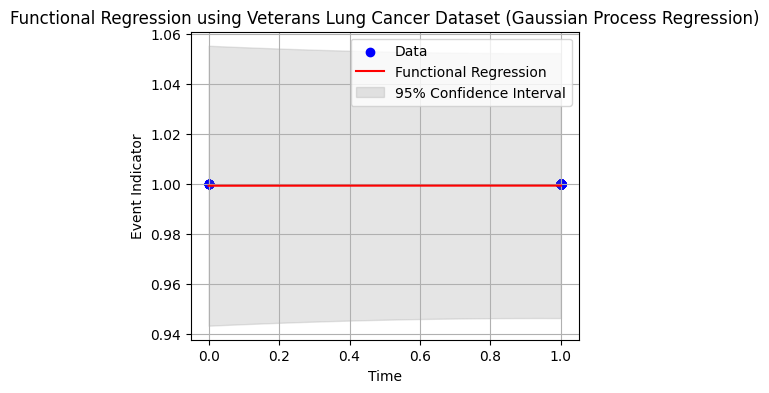

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times from the dataset
event_times = np.array([entry[0] for entry in data_y])

# Convert the event times to a suitable format for regression
X_flat = np.array(event_times).reshape(-1, 1)

# Extract the event indicators (0 for censored, 1 for event occurred)
# We'll use this as the response variable in functional regression
y_flat = np.array([1 if entry[1] else 0 for entry in data_y])

# Fit a Gaussian Process Regression model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
regression_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
regression_model.fit(X_flat, y_flat)

# Predict on new data
new_x = np.linspace(min(X_flat), max(X_flat), 100).reshape(-1, 1)
predicted_y, _ = regression_model.predict(new_x, return_std=True)

# Visualize the functional regression model
plt.figure(figsize=(5, 4))
plt.scatter(X_flat, y_flat, color='blue', label='Data')
plt.plot(new_x, predicted_y, color='red', label='Functional Regression')
plt.fill_between(new_x.flatten(), predicted_y - 1.96 * _, predicted_y + 1.96 * _,
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (Gaussian Process Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 35176.38565485416


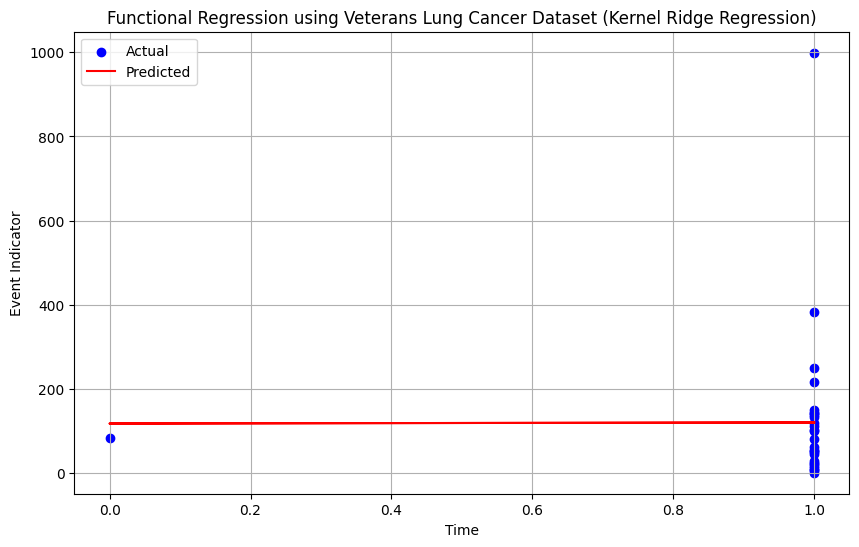

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times and event indicators from the dataset
event_times = np.array([entry[0] for entry in data_y])
event_indicators = np.array([entry[1] for entry in data_y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(event_times, event_indicators, test_size=0.2, random_state=42)

# Convert the event times to a suitable format for regression
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Fit Kernel Ridge Regression model
krr_model = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
krr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = krr_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the functional regression model
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (Kernel Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


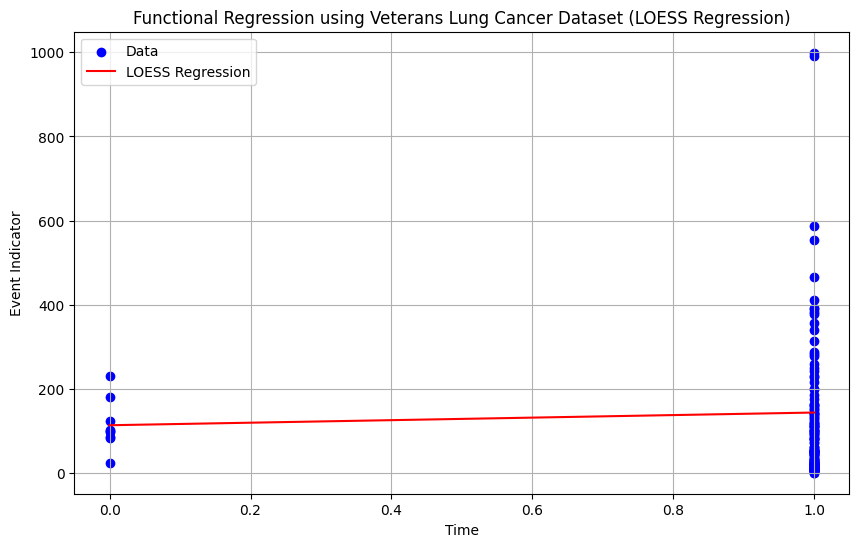

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times and event indicators from the dataset
event_times = np.array([entry[0] for entry in data_y])
event_indicators = np.array([entry[1] for entry in data_y])

# Sort the data based on event times
sorted_indices = np.argsort(event_times)
event_times_sorted = event_times[sorted_indices]
event_indicators_sorted = event_indicators[sorted_indices]

# Perform LOESS regression
smoothed = lowess(event_indicators_sorted, event_times_sorted, frac=0.1)

# Visualize the functional regression model
plt.figure(figsize=(10, 6))
plt.scatter(event_times_sorted, event_indicators_sorted, color='blue', label='Data')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOESS Regression')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (LOESS Regression)')
plt.legend()
plt.grid(True)
plt.show()

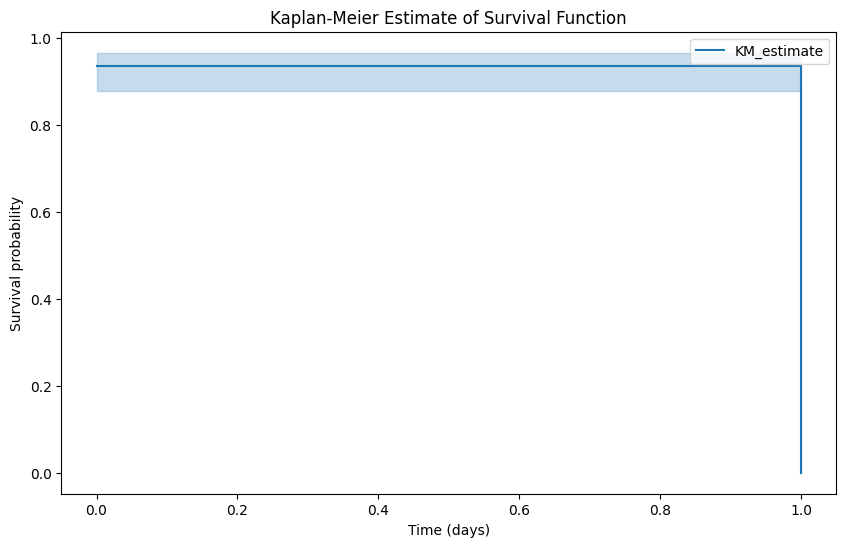

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd
from lifelines import KaplanMeierFitter

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract survival times and event indicators
survival_times = np.array([entry[0] for entry in data_y])
event_indicators = np.array([entry[1] for entry in data_y])

# Create a DataFrame for analysis
df = pd.DataFrame(data_x, columns=[f'Feature_{i}' for i in range(data_x.shape[1])])
df['Survival'] = survival_times
df['Event'] = event_indicators

# Perform survival analysis using lifelines
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(survival_times, event_observed=event_indicators)

# Plot the survival curve
plt.figure(figsize=(10,6))
kmf.plot()
plt.title('Kaplan-Meier Estimate of Survival Function')
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.show()


In [16]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)

Dataset Shape: (137, 8)

Column Names and Data Types:
Feature_0    float64
Feature_1    float64
Feature_2    float64
Feature_3    float64
Feature_4    float64
Feature_5    float64
Survival        bool
Event        float64
dtype: object


In [17]:
import pandas as pd
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Convert to pandas DataFrame for analysis
df = pd.DataFrame(data_x)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Pipeline for numerical columns
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='median')  # Impute missing values with median
)

# Pipeline for categorical columns
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),  # Impute missing values with a new category
    OneHotEncoder(drop='if_binary', sparse=False)  # One-hot encode categorical variables
)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Fit and transform the data
encoded_x = preprocessor.fit_transform(df)

# Create Cox proportional hazards model
coxph_model = CoxPHSurvivalAnalysis()

# Fit the model
coxph_model.fit(encoded_x, data_y)

# Print the coefficients
print("\nCoefficients:")
print(coxph_model.coef_)



Coefficients:
[-8.54942361e-03 -3.26217185e-02 -9.20017173e-05  3.40830713e+00
  2.61963560e+00  3.07649447e+00  2.22000782e+00  7.23265367e-02
  2.89935879e-01]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=2.45884e-20): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=5.53619e-20): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=9.65353e-20): result may not be accurate.
  delta = solve(
/usr/local/lib/python3.10/dist-packages/sksurv/linear_model/coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=7.72922e-20): result may not be accurate.
  delta = solve(


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


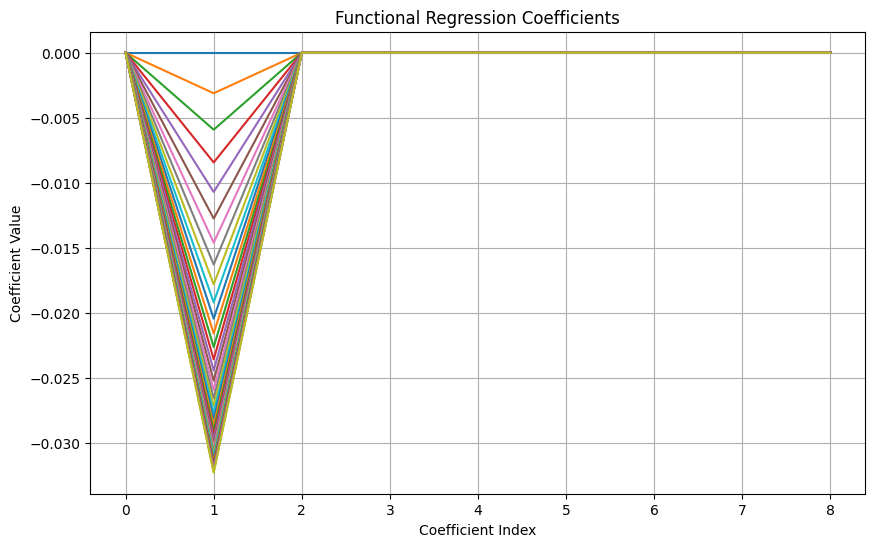

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder as SKOneHotEncoder

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Convert to pandas DataFrame for analysis
df = pd.DataFrame(data_x)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Pipeline for numerical columns
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='median')  # Impute missing values with median
)

# Pipeline for categorical columns
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),  # Impute missing values with a new category
    OneHotEncoder(drop='if_binary', sparse=False)  # One-hot encode categorical variables
)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Fit and transform the data
encoded_x = preprocessor.fit_transform(df)

# Create Coxnet proportional hazards model
coxnet_model = CoxnetSurvivalAnalysis(l1_ratio=0.5)  # Set l1_ratio for regularization

# Fit the model
coxnet_model.fit(encoded_x, data_y)

# Extract coefficients
coefs = coxnet_model.coef_

# Plot the functional regression coefficients
plt.figure(figsize=(10, 6))
plt.plot(coefs)
plt.title('Functional Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


In [19]:
!pip install scikit-fda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 68.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for fdasrsf: filename=fdasrsf-2.5.10-cp310-cp310-linux_x86_64.whl size=3081580 sha256=30c15167539204ffad8c8804c38065fbc22ed8863de18a02a8d2bf023ec94dc1
  Stored in directory: /root/.cache/pip/wheels/e8/52/1c/c4c363a070fc6643f741e1e7ecaae39377bc19130052054270
Successfully built fdasrsf


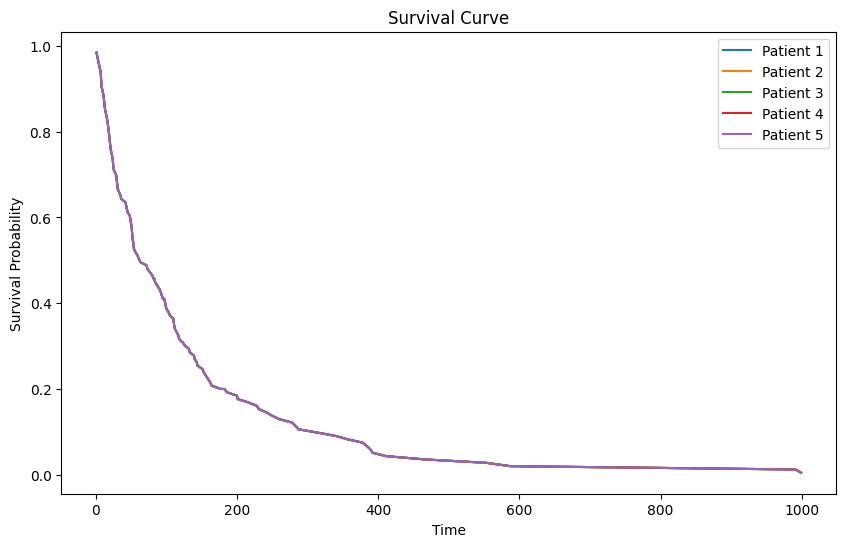

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract survival times from data_y
survival_times = np.array([entry[0] for entry in data_y])

# Prepare the covariate matrix for survival analysis
# Here, we use the original survival times as functional predictors
covariate_matrix = survival_times.reshape(-1, 1)

# Fit Cox Proportional Hazards model
coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(covariate_matrix, data_y)

# Plot the survival curve based on the fitted model
plt.figure(figsize=(10, 6))
plt.title('Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# Get the survival function for each patient
for i in range(5):
    survival_function = coxph_model.predict_survival_function(covariate_matrix[i:i+1])[0]
    time_points = survival_function.x
    survival_probabilities = [survival_function(t) for t in time_points]
    plt.plot(time_points, survival_probabilities, label=f'Patient {i+1}')

plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


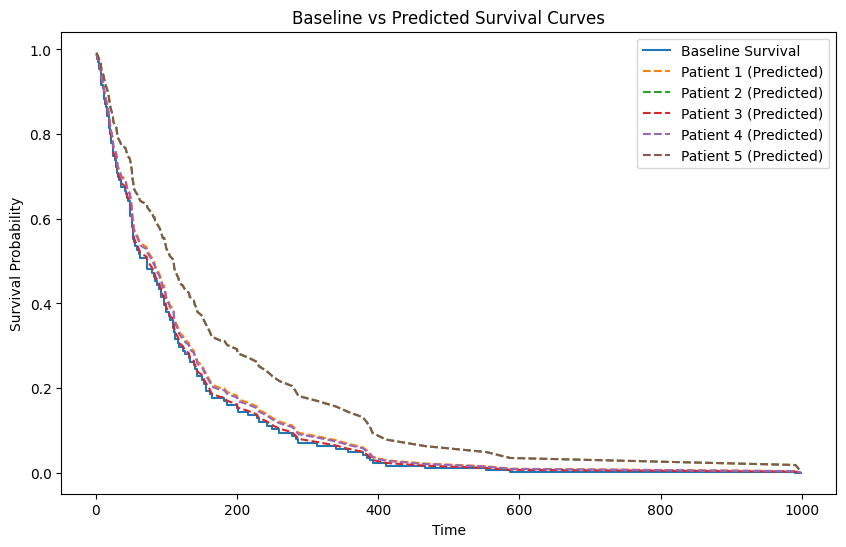

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Convert structured array to DataFrame
df_x = pd.DataFrame(data_x)

# Separate categorical and numerical columns
categorical_columns = df_x.select_dtypes(include=['object']).columns
numerical_columns = df_x.select_dtypes(include=['number']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first category to avoid multicollinearity
encoded_categorical = encoder.fit_transform(df_x[categorical_columns])

# Combine encoded categorical variables and numerical variables
X = np.concatenate([encoded_categorical, df_x[numerical_columns]], axis=1)

# Standardize input features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit Cox Proportional Hazards model
coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(X_standardized, data_y)

# Plot original survival curves
plt.figure(figsize=(10, 6))
baseline_survival = coxph_model.predict_survival_function(np.zeros((1, X_standardized.shape[1])))
plt.step(baseline_survival[0].x, baseline_survival[0].y, label='Baseline Survival')

# Predict survival curves for the same data
for i in range(5):  # Plot first 5 predicted survival curves
    predicted_survival = coxph_model.predict_survival_function(X_standardized[i:i+1])
    survival_curve = predicted_survival[0]
    plt.plot(survival_curve.x, survival_curve.y, linestyle='--', label=f'Patient {i+1} (Predicted)')

plt.title('Baseline vs Predicted Survival Curves')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()






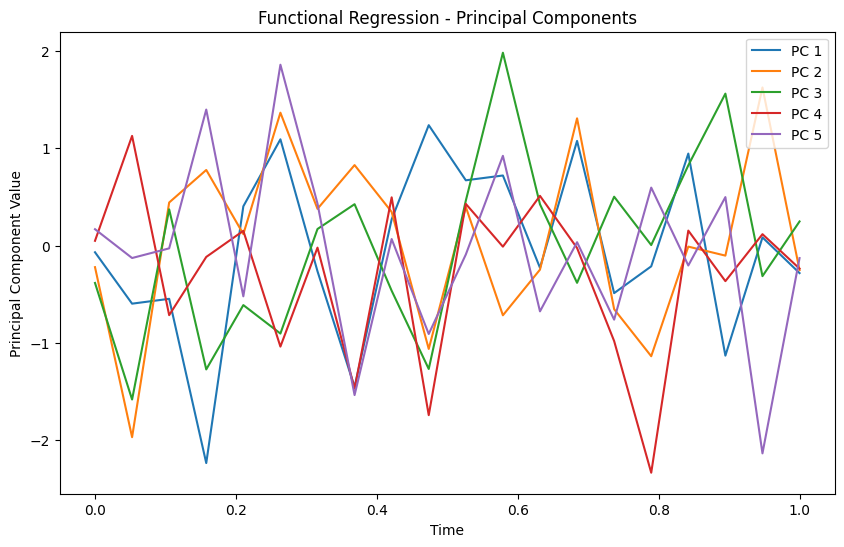

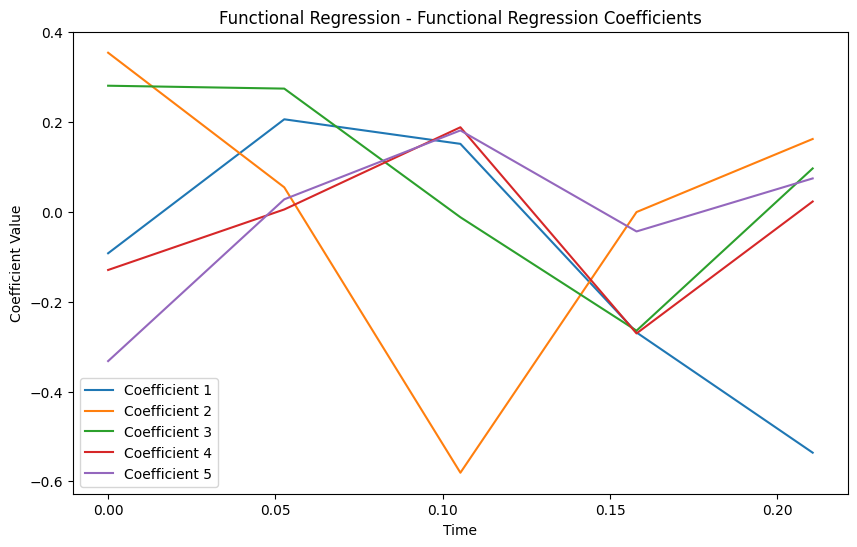

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.util import Surv
from sksurv.linear_model import CoxPHSurvivalAnalysis
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA

# Load the Veterans' Administration Lung Cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Simulate a functional predictor (example only, replace with actual functional predictor)
n_samples = data_x.shape[0]
n_features = 20  # Number of time points for the trajectory
time_points = np.linspace(0, 1, n_features)  # Time points
functional_predictor = np.random.randn(n_samples, n_features)  # Simulated functional predictor

# Convert the simulated functional predictor to FDataGrid object
fd_predictor = FDataGrid(data_matrix=functional_predictor, grid_points=time_points)

# Prepare survival data
y = Surv.from_arrays(data_y["Status"], data_y["Survival_in_days"])

# Reshape fd_predictor to remove the extra dimension
fd_predictor_reshaped = fd_predictor.data_matrix.reshape(fd_predictor.data_matrix.shape[:2])

# Fit Cox Proportional Hazards model with functional predictor
coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(fd_predictor_reshaped, y)


# Perform Functional Principal Component Analysis (FPCA) to reduce dimensionality
n_components = min(fd_predictor.n_samples, 5)  # Number of principal components
fpca = FPCA(n_components=n_components)
fd_predictor_fpca = fpca.fit_transform(fd_predictor)
coefficients = fpca.transform(fd_predictor)
# Plot the principal components
plt.figure(figsize=(10, 6))
for i in range(min(n_components, 5)):  # Plot first 5 principal components
    component_values = fpca.components_[i].data_matrix[0, :, 0]  # Extract component values
    plt.plot(time_points, component_values, label=f'PC {i+1}')  # Plot component values

plt.title('Functional Regression - Principal Components')
plt.xlabel('Time')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()
# Plot functional regression coefficients
plt.figure(figsize=(10, 6))
for i in range(min(n_components, 5)):  # Plot first 5 functional regression coefficients
    # Ensure that the number of time points matches the length of the coefficients
    n_time_points = min(len(time_points), len(coefficients[i]))

    # Plot the coefficient curve
    plt.plot(time_points[:n_time_points], coefficients[i][:n_time_points], label=f'Coefficient {i+1}')

plt.title('Functional Regression - Functional Regression Coefficients')
plt.xlabel('Time')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()






Mean Squared Error (MSE): 16027.02924053796


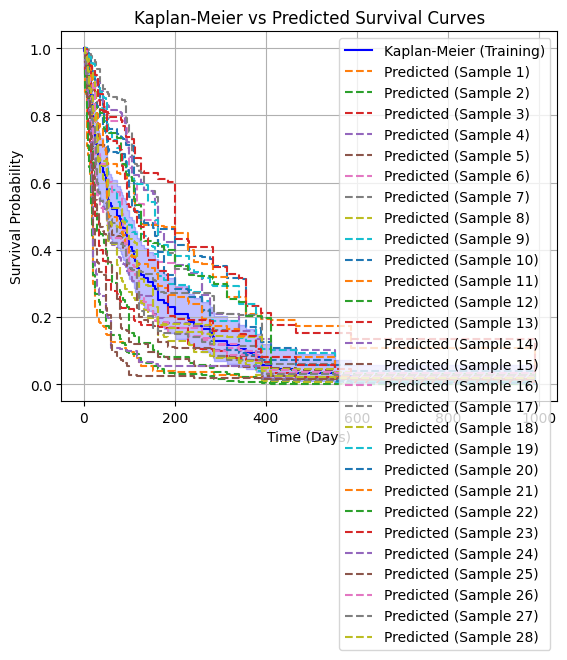

In [42]:
import numpy as np
import pandas as pd
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.metrics import mean_squared_error
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the dataset
data_x, data_y = load_veterans_lung_cancer()

# Convert the structured array to a pandas DataFrame
df_x = pd.DataFrame(data_x)
df_y = pd.DataFrame(data_y)

# Encode categorical variables
df_x_encoded = pd.get_dummies(df_x, drop_first=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y, test_size=0.2, random_state=42)

# Convert y_train to a structured array
y_train_structured = np.array(list(zip(y_train["Status"], y_train["Survival_in_days"])), dtype=[("Status", bool), ("Survival_in_days", float)])

# Train the Random Survival Forest model
rsf_model = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf_model.fit(X_train, y_train_structured)

# Predict survival probabilities for the test set
predicted_survival = rsf_model.predict_survival_function(X_test)
# Get the valid range of survival times
min_time = min(predicted_survival[0].x)
max_time = max(predicted_survival[0].x)

# Filter the survival times within the valid range
valid_survival_times = y_test["Survival_in_days"][
    (y_test["Survival_in_days"] >= min_time) & (y_test["Survival_in_days"] <= max_time)
]

# Calculate the corresponding predicted survival values
predicted_survival_values = np.array([sf(valid_survival_times) for sf in predicted_survival])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(valid_survival_times, np.mean(predicted_survival_values, axis=0))
print("Mean Squared Error (MSE):", mse)



# Plot the Kaplan-Meier survival curve for the test set
kmf = KaplanMeierFitter()
kmf.fit(y_train["Survival_in_days"], event_observed=y_train["Status"])
kmf.plot(label="Kaplan-Meier (Training)", color='blue')

# Plot the predicted survival curves for the test set
for i in range(len(predicted_survival)):
    plt.step(predicted_survival[i].x, predicted_survival[i].y, where="post",
             label=f"Predicted (Sample {i+1})", linestyle='--')

plt.title("Kaplan-Meier vs Predicted Survival Curves")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
pip install scikit-survival[gp]

Data type of y_true: <class 'numpy.ndarray'>
Shape of y_true: (137,)
Data type of predicted_survival_sum: <class 'numpy.ndarray'>
Shape of predicted_survival_sum: (137,)
y_true values: [ 72. 411. 228. 126. 118.  10.  82. 110. 314. 100.  42.   8. 144.  25.
  11.  30. 384.   4.  54.  13. 123.  97. 153.  59. 117.  16. 151.  22.
  56.  21.  18. 139.  20.  31.  52. 287.  18.  51. 122.  27.  54.   7.
  63. 392.  10.   8.  92.  35. 117. 132.  12. 162.   3.  95. 177. 162.
 216. 553. 278.  12. 260. 200. 156. 182. 143. 105. 103. 250. 100. 999.
 112.  87. 231. 242. 991. 111.   1. 587. 389.  33.  25. 357. 467. 201.
   1.  30.  44. 283.  15.  25. 103.  21.  13.  87.   2.  20.   7.  24.
  99.   8.  99.  61.  25.  95.  80.  51.  29.  24.  18.  83.  31.  51.
  90.  52.  73.   8.  36.  48.   7. 140. 186.  84.  19.  45.  80.  52.
 164.  19.  53.  15.  43. 340. 133. 111. 231. 378.  49.]
predicted_survival_sum values: [ 65.79857946   4.00664058  18.88847606  39.00165179  41.26042557
 121.97967322  61.5098

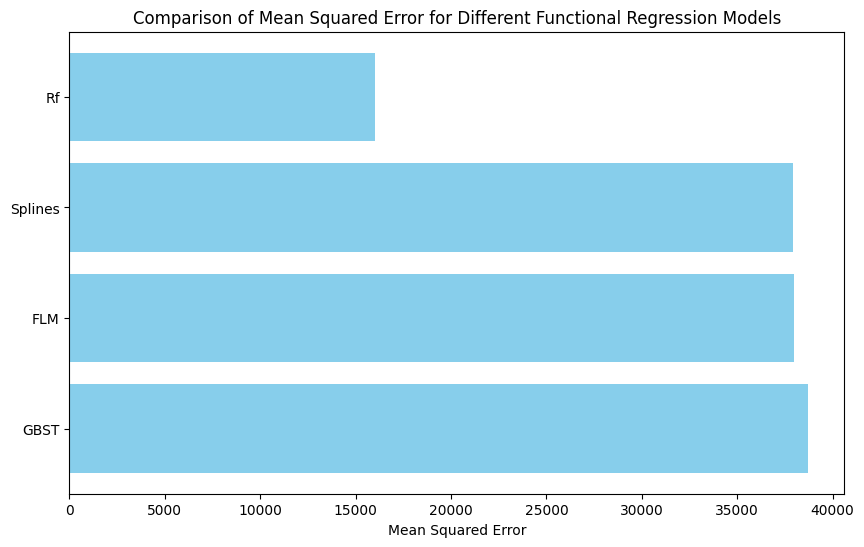

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.util import Surv
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.svm import FastSurvivalSVM
from sklearn.preprocessing import StandardScaler
from sksurv.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Prepare survival data
y = Surv.from_arrays(data_y["Status"], data_y["Survival_in_days"])

# Convert to pandas DataFrame for analysis
df_x = pd.DataFrame(data_x)

# Separate categorical and numerical columns
categorical_cols = df_x.select_dtypes(include=['object']).columns
numerical_cols = df_x.select_dtypes(include=['number']).columns

# One-hot encode categorical variables if there are any
encoded_categorical = None
if not categorical_cols.empty:
    encoder = OneHotEncoder()
    encoded_categorical = encoder.fit_transform(df_x[categorical_cols])

# Standardize numerical variables
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_x[numerical_cols])

# Combine encoded categorical variables and scaled numerical variables
if encoded_categorical is not None:
    X = np.concatenate([encoded_categorical, scaled_numerical], axis=1)
else:
    X = scaled_numerical

# Fit and evaluate each model
models = {
    "GBST": GradientBoostingSurvivalAnalysis(),
    "FLM": CoxnetSurvivalAnalysis(fit_baseline_model=True),
    "Splines": CoxPHSurvivalAnalysis(),
    #"Neural Network": FastSurvivalSVM()
}

mse_results = {}

for name, model in models.items():
    model.fit(X, y)
    predicted_survival = model.predict_survival_function(X)
    y_true = np.array([entry[1] for entry in data_y])
    predicted_survival_sum = np.zeros_like(y_true)  # Initialize sum array
    for sf in predicted_survival:
        survival_at_times = sf(np.array(y_true))
        predicted_survival_sum += survival_at_times  # Add survival probabilities at observed times
    print("Data type of y_true:", type(y_true))
    print("Shape of y_true:", y_true.shape)
    print("Data type of predicted_survival_sum:", type(predicted_survival_sum))
    print("Shape of predicted_survival_sum:", predicted_survival_sum.shape)
    print("y_true values:", y_true)
    print("predicted_survival_sum values:", predicted_survival_sum)
    mse = mean_squared_error(y_true, predicted_survival_sum)
    mse_results[name] = mse

# Plot MSE results
mse_results["Rf"]=16027.02924053796
print(mse_results)
plt.figure(figsize=(10, 6))
plt.barh(list(mse_results.keys()), list(mse_results.values()), color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Functional Regression Models')
plt.show()

